<a href="https://colab.research.google.com/github/Landhep11/Mathtools/blob/main/tugas06.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Import Module

import pandas as pd
import numpy as np
from math import sqrt
import seaborn as sns
from matplotlib import pyplot as plt

# Statistics
from statistics import median,mean, stdev
from scipy import signal

import scipy.stats as stats
from scipy.stats import poisson, norm
from scipy.special import factorial

In [ ]:
# Import Data
df = pd.read_csv('https://raw.githubusercontent.com/Landhep11/Mathtools/main/customer_data.csv')
df.describe()

,label,id,fea_1,fea_2,fea_3,fea_4,fea_5,fea_6,fea_7,fea_8,fea_9,fea_10,fea_11
count,1125.000000,1.125000e+03,1125.000000,976.000000,1125.000000,1.125000e+03,1125.000000,1125.000000,1125.000000,1125.000000,1125.000000,1125.000000,1125.000000
mean,0.200000,5.783677e+07,5.482667,1283.911373,2.333333,1.208836e+05,1.928889,10.872000,4.832889,100.802667,4.195556,164618.495111,134.999004
std,0.400178,1.817150e+06,1.383338,51.764022,0.878773,8.844523e+04,0.257125,2.676437,2.971182,11.988955,0.855679,152520.488281,112.616798
min,0.000000,5.498235e+07,1.000000,1116.500000,1.000000,1.500000e+04,1.000000,3.000000,-1.000000,64.000000,1.000000,60000.000000,1.000000
25%,0.000000,5.499050e+07,4.000000,1244.000000,1.000000,7.200000e+04,2.000000,8.000000,5.000000,90.000000,3.000000,60044.000000,1.000000
50%,0.000000,5.898975e+07,5.000000,1281.500000,3.000000,1.020000e+05,2.000000,11.000000,5.000000,105.000000,4.000000,72000.000000,173.205081
75%,0.000000,5.899799e+07,7.000000,1314.500000,3.000000,1.390000e+05,2.000000,11.000000,5.000000,111.000000,5.000000,151307.000000,202.484567
max,1.000000,5.900624e+07,7.000000,1481.000000,3.000000,1.200000e+06,2.000000,16.000000,10.000000,115.000000,5.000000,650070.000000,707.106781


In [ ]:
# This function will find the mean of the given list
def find_mean(ls:list):
    # check if the list has some values
    if ls:
        # return the mean(sum_of_list_values/count_of_values_in_list)
        return(sum(ls)/len(ls))
    else:
        return 0
print("Mean for fea_1: ",find_mean(list(df['fea_1'])))


Mean for fea_1:  5.482666666666667


In [ ]:
# This function will calculate variance of the given list of data-points.
# 1. calculate mean
# 2. find deviation from mean
# 3. square each deviation from mean
# 4. Find the sum of squares
# 5. Divide sum of squares by N-1(for sample data-points) or N(for population data-points)

def calculate_variance(ls:list):
    # check mean of the list of values
    mean = find_mean(ls)
    if mean!=0:
        return sum((i - mean) ** 2 for i in ls) / len(ls)
    else:
        return 0
    
print("Variance for fea_1: ",calculate_variance(list(df['fea_1'])))

Variance for fea_1:  1.9119217777777606


In [ ]:
# This method will calculate the standard deviation
def calculate_standard_deviation(ls:list):
    return calculate_variance(ls)**(1/2)

print("Standard Devation for fea_1: ",calculate_standard_deviation(list(df['fea_1'])))

Standard Devation for fea_1:  1.382722596104425


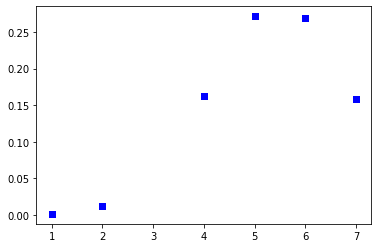

In [ ]:
# Normal Distribution
mean_fea_1 = mean(df['fea_1'])
sd_fea_1 = stdev(df['fea_1'])
normal_df = norm.pdf(df['fea_1'],loc = mean_fea_1, scale = sd_fea_1)
plt.plot(df['fea_1'], normal_df, 'bs')
plt.show()

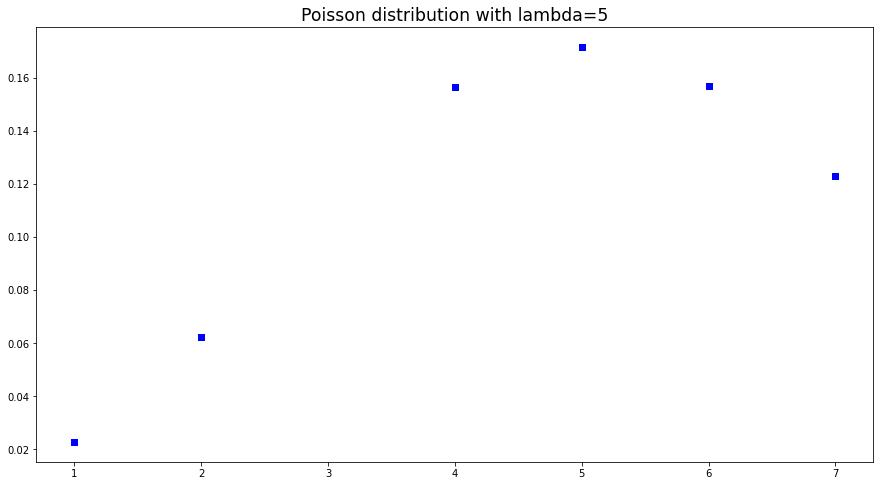

In [ ]:
# Poisson Distribution

x=pd.Series(df['fea_1']).to_numpy()

y = np.exp(-mean_fea_1)*np.power(mean_fea_1, x)/factorial(x)

plt.figure(figsize=(15,8))
plt.title('Poisson distribution with lambda=5', fontsize='xx-large')
plt.plot(x, y, 'bs')
plt.show()